# ***Complete Guide to Generative AI for Data Analysis and Data Science***

---



### **Chapter 8:** *Visualizing Data*

a) Visualizing Trends

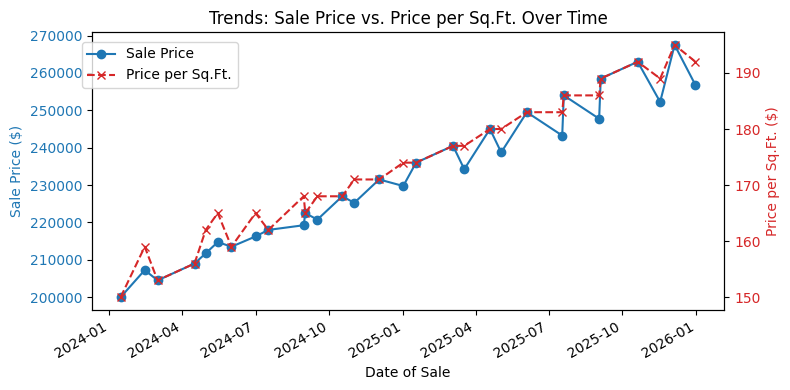

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Dataset
data = {
    'Date of Sale': [
        '2024-01-15', '2024-03-01', '2024-04-16', '2024-06-01', '2024-07-17',
        '2024-09-01', '2024-10-17', '2024-12-02', '2025-01-17', '2025-03-04',
        '2025-04-19', '2025-06-04', '2025-07-20', '2025-09-04', '2025-10-20',
        '2025-12-05', '2024-02-14', '2024-04-30', '2024-07-01', '2024-09-16',
        '2024-11-01', '2025-01-01', '2025-03-18', '2025-05-03', '2025-07-18',
        '2025-09-02', '2025-11-17', '2025-12-31', '2024-05-15', '2024-08-30'
    ],
    'Sale Price': [
        200000, 204500, 209000, 213500, 218000,
        222500, 227000, 231500, 236000, 240500,
        245000, 249500, 254000, 258500, 263000,
        267500, 207250, 211750, 216250, 220750,
        225250, 229750, 234250, 238750, 243250,
        247750, 252250, 256750, 214750, 219250
    ],
    'Price per Sq.Ft.': [
        150, 153, 156, 159, 162,
        165, 168, 171, 174, 177,
        180, 183, 186, 189, 192,
        195, 159, 162, 165, 168,
        171, 174, 177, 180, 183,
        186, 189, 192, 165, 168
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])

# Sort by date for better plotting
df.sort_values('Date of Sale', inplace=True)

# Create plot
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot Sale Price
color = 'tab:blue'
ax1.set_xlabel('Date of Sale')
ax1.set_ylabel('Sale Price ($)', color=color)
ax1.plot(df['Date of Sale'], df['Sale Price'], color=color, label='Sale Price', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Secondary Y-axis for Price per Sq.Ft.
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Price per Sq.Ft. ($)', color=color)
ax2.plot(df['Date of Sale'], df['Price per Sq.Ft.'], color=color, label='Price per Sq.Ft.', linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Date formatting
date_format = DateFormatter('%Y-%m')
ax1.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

# Title and legend
plt.title('Trends: Sale Price vs. Price per Sq.Ft. Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Layout and display
plt.tight_layout()
plt.show()

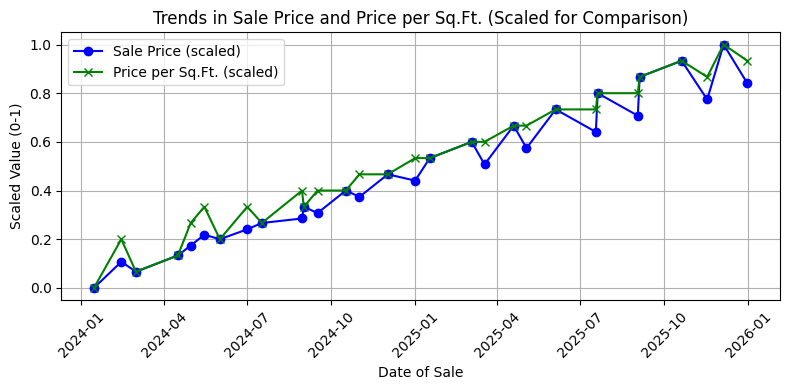

In [3]:
#Using scaling

from sklearn.preprocessing import MinMaxScaler

# Normalize the values for comparison (0-1 scale)
scaler = MinMaxScaler()
df[['Sale Price Scaled', 'Price per Sq.Ft. Scaled']] = scaler.fit_transform(
    df[['Sale Price', 'Price per Sq.Ft.']]
)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(df['Date of Sale'], df['Sale Price Scaled'], label='Sale Price (scaled)', marker='o', color='blue')
plt.plot(df['Date of Sale'], df['Price per Sq.Ft. Scaled'], label='Price per Sq.Ft. (scaled)', marker='x', color='green')

# Formatting
plt.title('Trends in Sale Price and Price per Sq.Ft. (Scaled for Comparison)')
plt.xlabel('Date of Sale')
plt.ylabel('Scaled Value (0-1)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

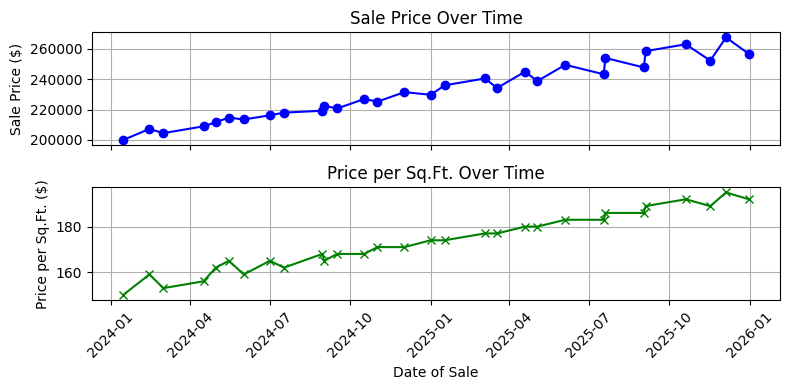

In [4]:
#Two separate graphs

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

# Plot Sale Price
ax1.plot(df['Date of Sale'], df['Sale Price'], color='blue', marker='o')
ax1.set_title('Sale Price Over Time')
ax1.set_ylabel('Sale Price ($)')
ax1.grid(True)

# Plot Price per Sq.Ft.
ax2.plot(df['Date of Sale'], df['Price per Sq.Ft.'], color='green', marker='x')
ax2.set_title('Price per Sq.Ft. Over Time')
ax2.set_ylabel('Price per Sq.Ft. ($)')
ax2.set_xlabel('Date of Sale')
ax2.grid(True)

# Rotate dates and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

b) Visualizing Correlation

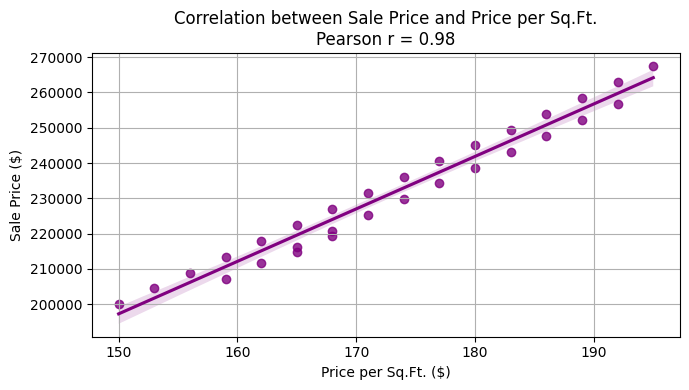

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Dataset
data = {
    'Sale Price': [
        200000, 204500, 209000, 213500, 218000,
        222500, 227000, 231500, 236000, 240500,
        245000, 249500, 254000, 258500, 263000,
        267500, 207250, 211750, 216250, 220750,
        225250, 229750, 234250, 238750, 243250,
        247750, 252250, 256750, 214750, 219250
    ],
    'Price per Sq.Ft.': [
        150, 153, 156, 159, 162,
        165, 168, 171, 174, 177,
        180, 183, 186, 189, 192,
        195, 159, 162, 165, 168,
        171, 174, 177, 180, 183,
        186, 189, 192, 165, 168
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate correlation
r_value, _ = pearsonr(df['Price per Sq.Ft.'], df['Sale Price'])

# Plot
plt.figure(figsize=(7, 4))
sns.regplot(x='Price per Sq.Ft.', y='Sale Price', data=df, color='purple', marker='o')
plt.title(f'Correlation between Sale Price and Price per Sq.Ft.\nPearson r = {r_value:.2f}')
plt.xlabel('Price per Sq.Ft. ($)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

c) Visualizing Composition

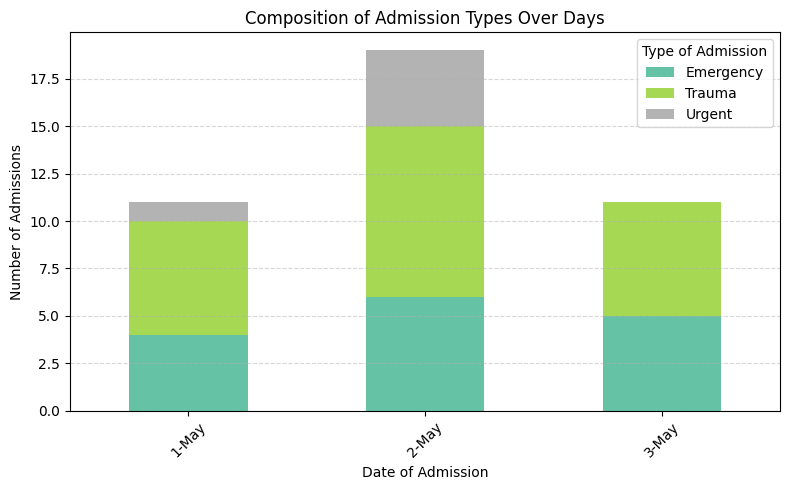

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
#Stacked bar chart is used when checking composition against other parameters (like time)
# Dataset
data = {
    'Date of Admission': [
        '1-May', '1-May', '1-May', '1-May', '1-May', '1-May', '1-May', '1-May', '1-May', '1-May', '1-May',
        '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May', '2-May',
        '3-May', '3-May', '3-May', '3-May', '3-May', '3-May', '3-May', '3-May', '3-May', '3-May', '3-May'
    ],
    'Type of Admission': [
        'Urgent', 'Emergency', 'Emergency', 'Emergency', 'Emergency', 'Trauma', 'Trauma', 'Trauma', 'Trauma', 'Trauma', 'Trauma',
        'Trauma', 'Trauma', 'Emergency', 'Emergency', 'Trauma', 'Trauma', 'Urgent', 'Trauma', 'Emergency', 'Trauma', 'Urgent', 'Trauma', 'Emergency', 'Urgent', 'Emergency', 'Urgent', 'Trauma', 'Emergency', 'Trauma',
        'Trauma', 'Trauma', 'Trauma', 'Emergency', 'Emergency', 'Trauma', 'Emergency', 'Trauma', 'Emergency', 'Trauma', 'Emergency'
    ]
}

# Load into DataFrame
df = pd.DataFrame(data)

# Count occurrences of each admission type per day
composition = df.groupby(['Date of Admission', 'Type of Admission']).size().unstack(fill_value=0)

# Plot
composition.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

# Formatting
plt.title('Composition of Admission Types Over Days')
plt.xlabel('Date of Admission')
plt.ylabel('Number of Admissions')
plt.legend(title='Type of Admission')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

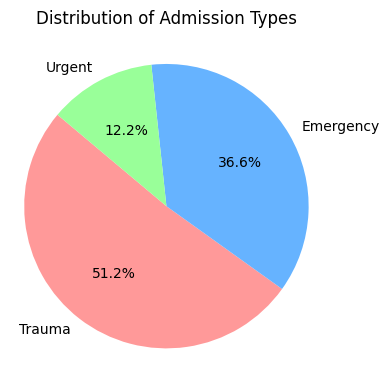

In [7]:
#Composition

# Count admission types
admission_counts = df['Type of Admission'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    admission_counts,
    labels=admission_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999', '#66b3ff', '#99ff99']
)

# Formatting
plt.title('Distribution of Admission Types')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()

# Show plot
plt.show()

d) Visualizing Distributions (Checking for Normality)

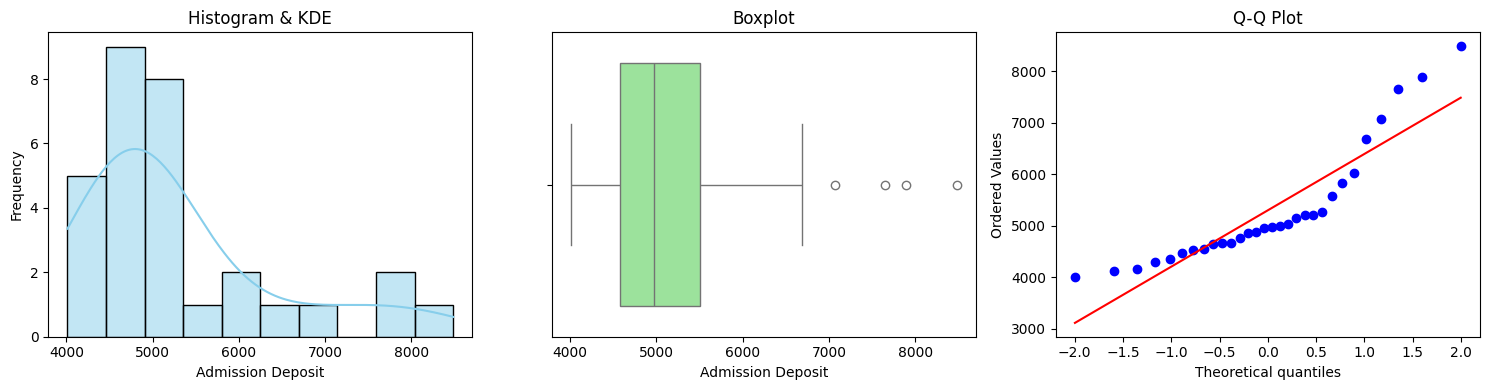

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data
admission_deposit = [
    5272, 4011, 4525, 4667, 5210, 5836, 4128, 4956, 4648, 4482,
    5042, 4851, 7890, 7072, 5578, 8484, 5219, 4350, 4999, 4884,
    6023, 7648, 4296, 4764, 5146, 4153, 4662, 4555, 6691, 4978
]

# Convert to NumPy array
data = np.array(admission_deposit)

# Set up plots
plt.figure(figsize=(15, 4))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(data, bins=10, kde=True, color='skyblue')
plt.title('Histogram & KDE')
plt.xlabel('Admission Deposit')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=data, color='lightgreen')
plt.title('Boxplot')
plt.xlabel('Admission Deposit')

# Q-Q plot
plt.subplot(1, 3, 3)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')

# Show plots
plt.tight_layout()
plt.show()

#Histogram & KDE: Reveals distribution shape.
#Boxplot: Shows outliers, skewness.
#Q-Q Plot: If points lie on a straight diagonal line → likely normal. Curvature suggests deviation.

**Challenge: Visualizing Data** <br>
1. Create a dataset with the following description: <br>
Create a data set for the sale of grocery store items. each item should have a date sold. product name, product category, cost per unit, a sale price per unit, units sold, total cost of unit sold, total revenue of units sold. include at least 10 different products. There should be data for 30 days. There should be at least 1000 rows of data. The sale price per unit and the cost per unit should be normally distributed.
2. Generate a visualization to show the distribution of: <br>
a) Cost per unit column <br>
b) Sales price per unit column

In [9]:
#Generating the required data

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Define product catalog
products = [
    {"name": "Milk", "category": "Dairy"},
    {"name": "Eggs", "category": "Dairy"},
    {"name": "Bread", "category": "Bakery"},
    {"name": "Apples", "category": "Produce"},
    {"name": "Bananas", "category": "Produce"},
    {"name": "Chicken Breast", "category": "Meat"},
    {"name": "Ground Beef", "category": "Meat"},
    {"name": "Orange Juice", "category": "Beverages"},
    {"name": "Cereal", "category": "Grocery"},
    {"name": "Yogurt", "category": "Dairy"},
]

# Generate a list of 30 dates
start_date = datetime.strptime("2025-07-01", "%Y-%m-%d")
dates = [start_date + timedelta(days=i) for i in range(30)]

# Generate 1000+ rows of data
rows = []
for _ in range(1000):
    product = random.choice(products)
    date_sold = random.choice(dates)

    cost_per_unit = np.round(np.random.normal(loc=2.5, scale=0.5), 2)
    sale_price_per_unit = np.round(np.random.normal(loc=3.0, scale=0.6), 2)
    units_sold = np.random.randint(1, 21)  # 1 to 20 units

    total_cost = np.round(cost_per_unit * units_sold, 2)
    total_revenue = np.round(sale_price_per_unit * units_sold, 2)

    rows.append({
        "Date Sold": date_sold.strftime("%Y-%m-%d"),
        "Product Name": product["name"],
        "Product Category": product["category"],
        "Cost per Unit": cost_per_unit,
        "Sale Price per Unit": sale_price_per_unit,
        "Units Sold": units_sold,
        "Total Cost": total_cost,
        "Total Revenue": total_revenue
    })

# Create DataFrame
df = pd.DataFrame(rows)

# Export to CSV
df.to_csv("grocery_sales_data_Challenge.csv", index=False)
print("CSV file 'grocery_sales_data_Challenge.csv' has been created.")

CSV file 'grocery_sales_data_Challenge.csv' has been created.


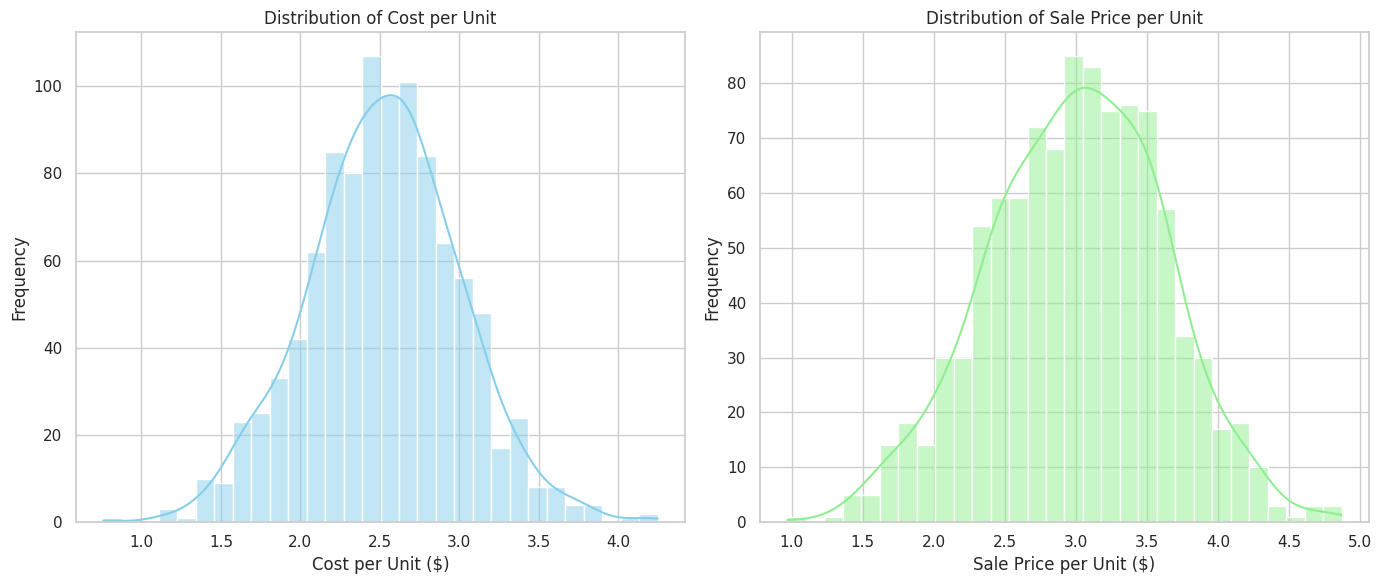

In [10]:
#visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("grocery_sales_data_Challenge.csv")

# Set style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(14, 6))

# Plot 1: Distribution of Cost per Unit
plt.subplot(1, 2, 1)
sns.histplot(df['Cost per Unit'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Cost per Unit')
plt.xlabel('Cost per Unit ($)')
plt.ylabel('Frequency')

# Plot 2: Distribution of Sale Price per Unit
plt.subplot(1, 2, 2)
sns.histplot(df['Sale Price per Unit'], kde=True, color='lightgreen', bins=30)
plt.title('Distribution of Sale Price per Unit')
plt.xlabel('Sale Price per Unit ($)')
plt.ylabel('Frequency')

# Layout adjustment
plt.tight_layout()
plt.show()